In [35]:
import numpy as np
import matplotlib.pyplot as plt

H2 cc-pVDZ (heavy-hex) 
- Params: 212

H2 cc-pVDZ (square)
- Params = 219

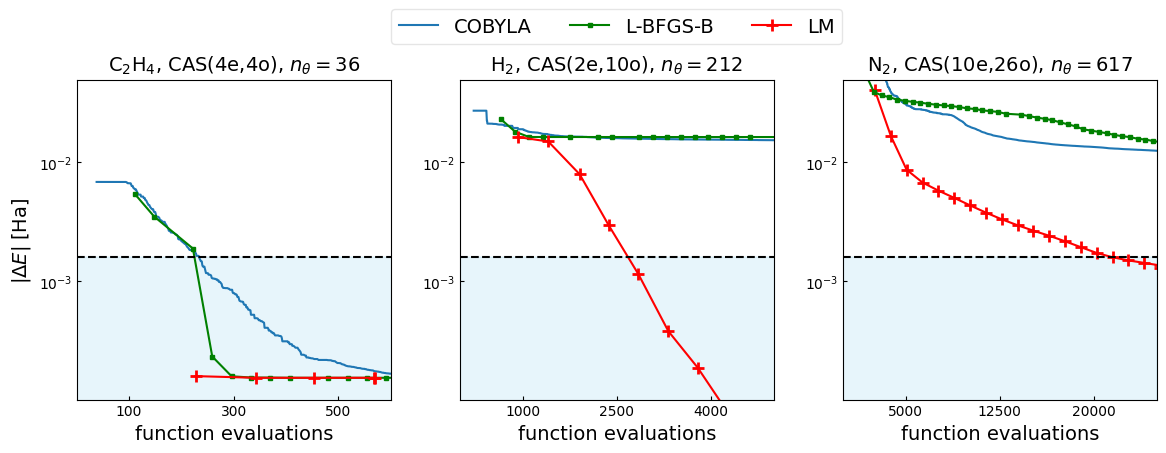

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"lines.markersize":3, "xtick.major.size":3, "xtick.minor.size":3, "ytick.major.size":3, "ytick.minor.size":3, "xtick.direction":"in", "ytick.direction":"in"}) 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

trace_path = "../data/vqe/c2h4.csv"
df = pd.read_csv(trace_path)

df_lm = df[df["method"] == "LM"]
df_cobyla = df[df["method"] == "COBYLA"]
df_lbfgsb = df[df["method"] == "L-BFGS-B"]

ax1.semilogy(df_cobyla["nfev"], df_cobyla["error"], label="COBYLA")
ax1.semilogy(df_lbfgsb["nfev"], df_lbfgsb["error"], label="L-BFGS-B", c="green", marker="s", markersize=3)
ax1.semilogy(df_lm["nfev"], df_lm["error"], label="LM", c="red", marker="+", markersize=8, markeredgewidth=2)
ax1.fill_between(np.arange(0, 22500), 1e-11, 1.594e-3, color="skyblue", alpha=0.2)

ax1.set_xlim(0, 600)
ax1.set_ylim(1e-4, 5e-2)
ax1.set_title(r"$\text{C}_2\text{H}_4$, CAS(4e,4o), $n_\theta = 36$",fontsize=14)

trace_path = "../data/vqe/h2_ccpvdz/heavyhex.csv"
df = pd.read_csv(trace_path)

df_lm = df[df["method"] == "LM"]
df_cobyla = df[df["method"] == "COBYLA"]
df_lbfgsb = df[df["method"] == "L-BFGS-B"]

ax2.semilogy(df_cobyla["nfev"], df_cobyla["error"], label="COBYLA")
ax2.semilogy(df_lbfgsb["nfev"], df_lbfgsb["error"], label="L-BFGS-B", c="green", marker="s", markersize=3)
ax2.semilogy(df_lm["nfev"], df_lm["error"], label="LM", c="red", marker="+", markersize=8, markeredgewidth=2)
ax2.fill_between(np.arange(0, 22500), 1e-11, 1.594e-3, color="skyblue", alpha=0.2)

ax2.set_xlim(0, 5000)
ax2.set_ylim(1e-4, 5e-2)
ax2.set_title(r"$\text{H}_2$, CAS(2e,10o), $n_\theta = 212$",fontsize=14)

trace_path = "../data/vqe/n2_sto6g/square.csv"
df = pd.read_csv(trace_path)

df_lm = df[df["method"] == "LM"]
df_cobyla = df[df["method"] == "COBYLA"]
df_lbfgsb = df[df["method"] == "L-BFGS-B"]

ax3.semilogy(df_lm["nfev"], df_lm["error"], label="LM", c="red", marker="+", markersize=8, markeredgewidth=2)
ax3.semilogy(df_cobyla["nfev"], df_cobyla["error"], label="COBYLA")
ax3.semilogy(df_lbfgsb["nfev"], df_lbfgsb["error"], label="L-BFGS-B", c="green", marker="s", markersize=3)
ax3.set_xlim(0, 25000)
ax3.set_ylim(1e-4, 5e-2)

ax3.fill_between(np.arange(0, 25000), 1e-11, 1.594e-3, color="skyblue", alpha=0.2)
ax3.set_title(r"$\text{N}_2$, CAS(10e,26o), $n_\theta = 617$",fontsize=14)
ax3.set_xticks([5000,12500,20000])
ax2.set_xticks([1000,2500,4000])
ax1.set_xticks([100,300,500])


for ax in (ax1, ax2, ax3):
    ax.set_xlabel("function evaluations", fontsize=14)
    ax.axhline(1.594e-3, c='k', ls='--')
    ax.set_yticks([1e-3,1e-2])
    ax.minorticks_off()
ax1.set_ylabel(r"$|\Delta E|$ [Ha]", fontsize=14)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, ncol=3, loc="upper center", bbox_to_anchor=(0.5, 1.25), framealpha=0.5, fontsize=14)

import tikzplotlib
fig.subplots_adjust(
    left=0.08,
    right=0.98,
    bottom=0.16,
    top=0.80,
    wspace=0.22,   # less horizontal white space between panels
)

fig.savefig("vqe_convergence.svg", dpi=600, bbox_inches="tight")
plt.show()
